# Loading the datasets

In [8]:
import pickle
from sklearn.model_selection import train_test_split

with open('out/df_final.pkl', 'rb') as f:
    df = pickle.load(f)

X = df.drop('topic_label', axis=1)
y = df['topic_label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

with open("supervised_train_test_data/train_test_data.pkl", "rb") as f:
    data = pickle.load(f)

X_s_train = data['X_train']
X_s_test = data['X_test']
y_s_train = data['y_train']
y_s_test = data['y_test']

Mean CV ROC AUC Score: 0.959940262420897
Test Data AUC ROC: 0.9630158947391293


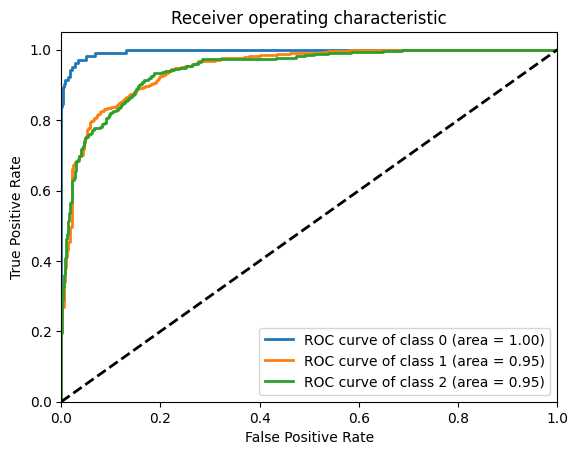

              precision    recall  f1-score   support

      Events       0.96      0.88      0.92       104
   Lifestyle       0.94      0.86      0.90       993
    Politics       0.65      0.85      0.74       316

    accuracy                           0.86      1413
   macro avg       0.85      0.86      0.85      1413
weighted avg       0.88      0.86      0.86      1413



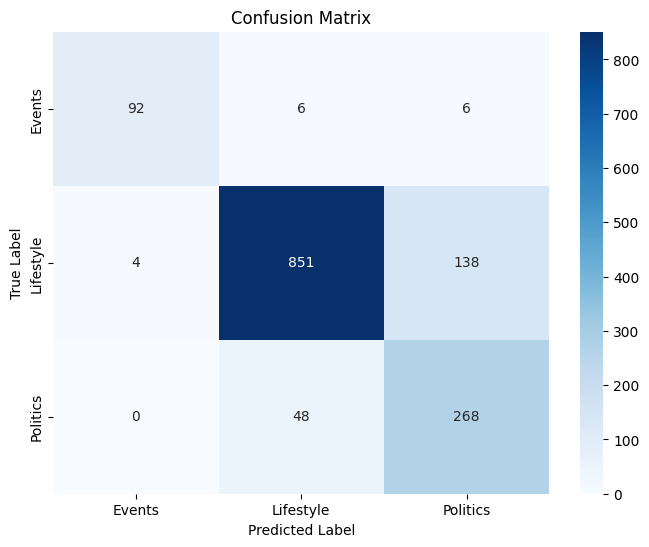

In [9]:
from helpers.evaluate_model import evaluate_model

with open('out/mnb_original_dataset.pkl', 'rb') as f:
    mnb_1 = pickle.load(f)

with open('out/mnb_stratified_dataset.pkl', 'rb') as f:
    mnb_2 = pickle.load(f)

evaluate_model(mnb_1, X_train, y_train, X_test, y_test)

Mean CV ROC AUC Score: 0.959940262420897
Test Data AUC ROC: 0.9669562583531986


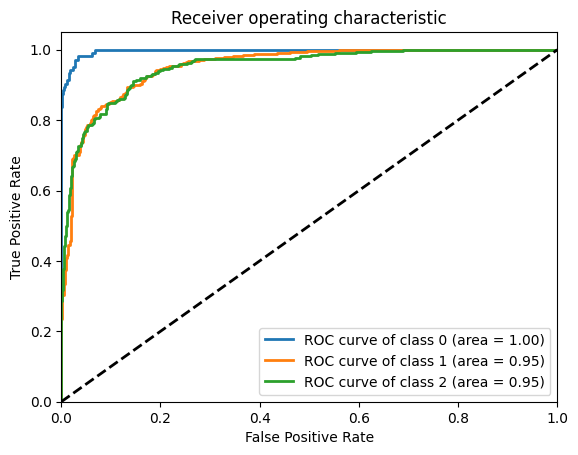

              precision    recall  f1-score   support

      Events       0.95      0.88      0.92       104
   Lifestyle       0.94      0.86      0.90       993
    Politics       0.66      0.86      0.75       316

    accuracy                           0.86      1413
   macro avg       0.85      0.87      0.85      1413
weighted avg       0.88      0.86      0.87      1413



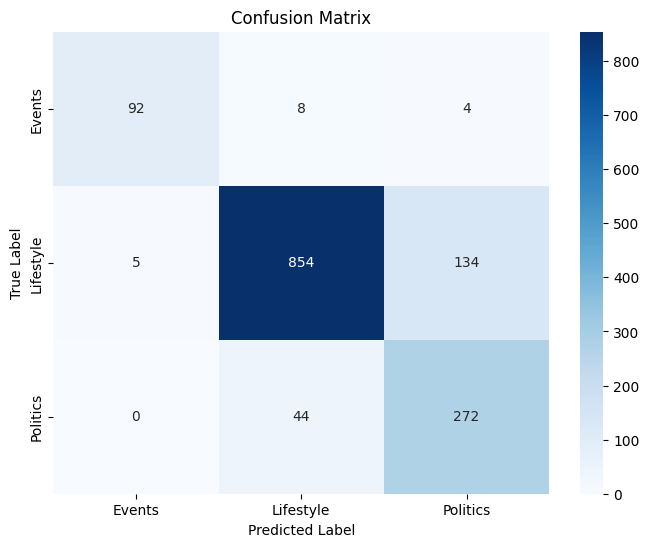

In [10]:
evaluate_model(mnb_2, X_train, y_train, X_test, y_test)

# Insights

Both models achieve relatively high accuracy scores, with an accuracy of approximately 86% for both. This indicates that both models are able to make accurate predictions on the test data.

Looking at the precision, recall, and F1-score for each class (Events, Lifestyle, Politics), we can observe that the performance metrics are consistent across both models. The precision, recall, and F1-score values for each class are similar between the two models, with slight variations in some cases.

## Effectiveness of Stratification

The performance of the model trained on the stratified dataset is comparable to that of the model trained on the original dataset. This suggests that the stratified dataset, which ensures a balanced distribution of class labels in the training and testing sets, does not significantly improve or degrade the model's performance compared to the model trained on the original dataset.

## Summary

In summary, both models demonstrate strong performance in classifying text documents into multiple categories. While the model trained on the stratified dataset may provide a slight improvement in class balance, the overall performance remains consistent with the model trained on the original dataset. This suggests that either approach could be viable depending on the specific requirements and characteristics of the dataset.